# Bike sharing prediction  

## Business Understanding

![Bike Sharing](image1.jpg)

As part of this project i am going to predict the demand for Bikes share on a given day in year with this the bike companies can plan their business accordingly based on the demand.

In [565]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import make_scorer

from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV 

## Data Understanding

In [566]:
# Reading the data from dataframe
data_frame = pd.read_csv('Bike_sharing.csv')

In [567]:
# displaying the few rows of dataset
data_frame.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [568]:
# displaying the info about the train data set
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [569]:
# finding the null values in the data set
data_frame.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [570]:
# function to handle the date column in the data frame
def Handling_time_feature(df,column):
    # splitting the time feature into seperate features
    df['year'] = pd.DatetimeIndex(df[column]).year
    df['month'] = pd.DatetimeIndex(df[column]).month
    df['day'] = pd.DatetimeIndex(df[column]).day
    df['hour'] = pd.DatetimeIndex(df[column]).hour
    df= df.drop(columns=[column], axis=0) # dropping the date column 
    return df


# calling the Handling_time_feature() to split the timestamp feature into seperate features
data_frame = Handling_time_feature(data_frame, 'timestamp')

## Exploratory Data Analysis

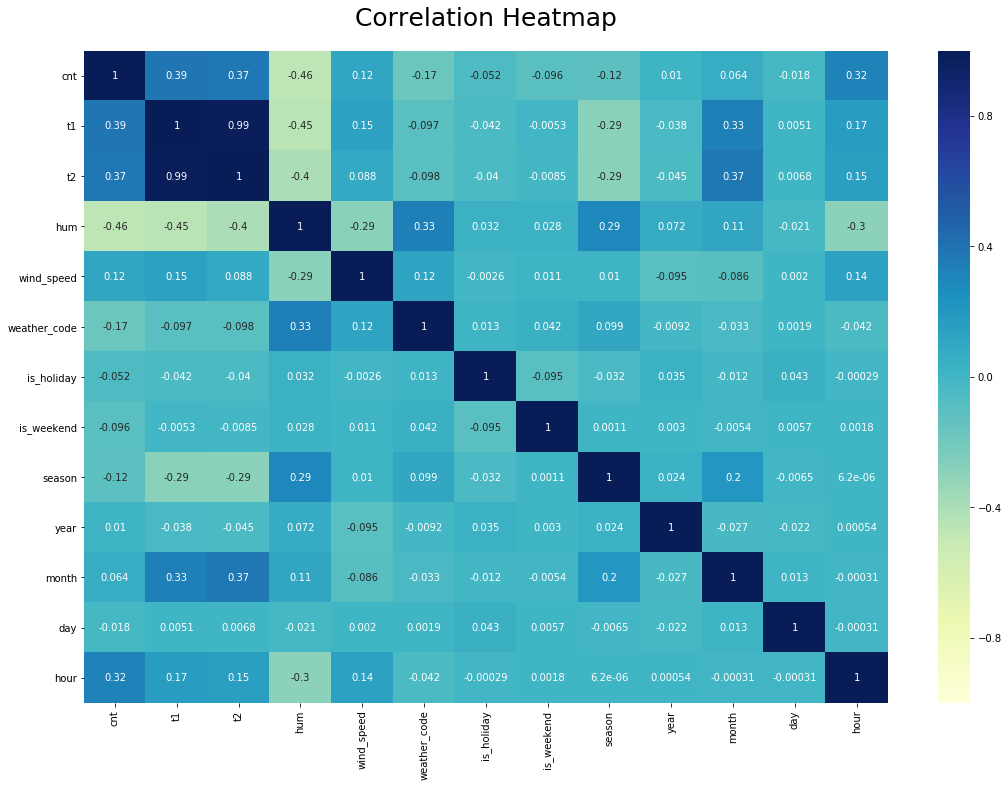

In [571]:
plt.figure(figsize=(18, 12))
heatmap = sns.heatmap(data_frame.corr(), vmin=-1, vmax=1, annot=True, cmap= 'YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=25);

Text(0.5, 1.0, 'Bike Share count VS Windspeed')

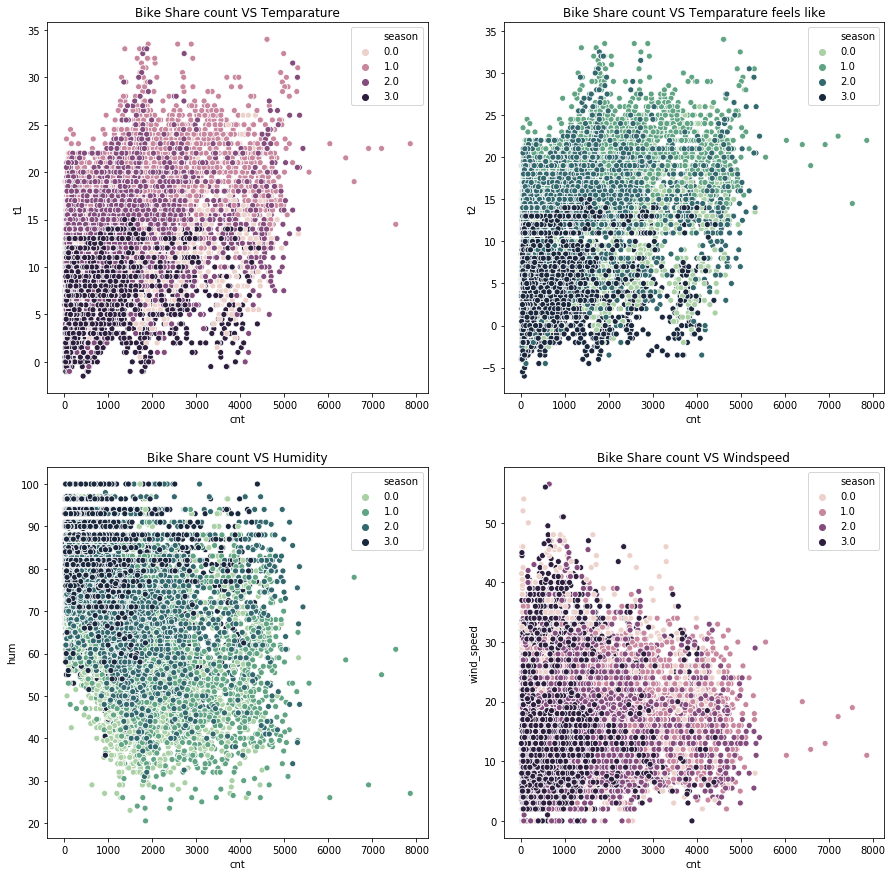

In [572]:
# plots for Bike share count VS Temparature, Temparature feels like, Humidity, Windspeed
fig,ax = plt.subplots(2,2, figsize=(15,15))
plot = sns.scatterplot(x="cnt", y="t1",hue = 'season',data=data_frame,ax= ax[0,0])
plot.set_title("Bike Share count VS Temparature")
plot = sns.scatterplot(x="cnt", y="t2",hue = 'season', palette="ch:r=-.5,l=.75",data=data_frame,ax= ax[0,1])
plot.set_title("Bike Share count VS Temparature feels like")
plot = sns.scatterplot(x="cnt", y="hum",hue = 'season', palette="ch:r=-.5,l=.75",data=data_frame,ax= ax[1,0])
plot.set_title("Bike Share count VS Humidity")
plot = sns.scatterplot(x="cnt", y="wind_speed",hue = 'season',data=data_frame,ax= ax[1,1])
plot.set_title("Bike Share count VS Windspeed")


<Figure size 1080x720 with 0 Axes>

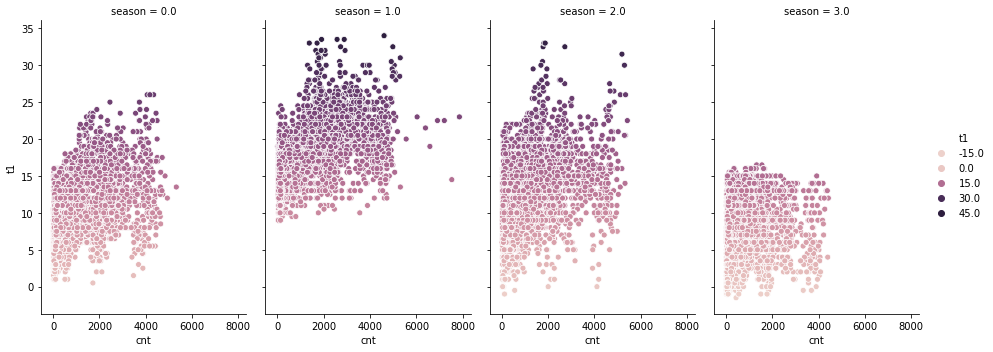

In [573]:
# Bike share based on season and temparature
plt.figure(figsize=(15, 10))
plot= sns.relplot(data=data_frame, x='cnt', y='t1', col="season", hue="t1", height=5, aspect=.65)


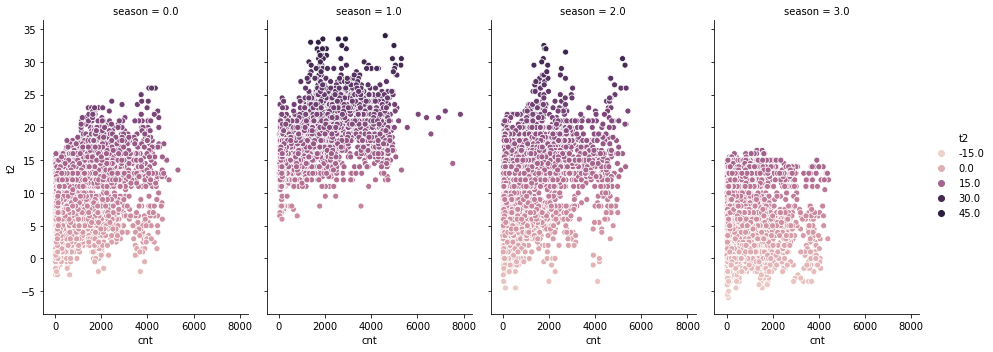

In [574]:
# Bike share based on season and temparature feels like
plot= sns.relplot(data=data_frame, x='cnt', y='t2', col="season", hue="t2", height=5, aspect=0.65)

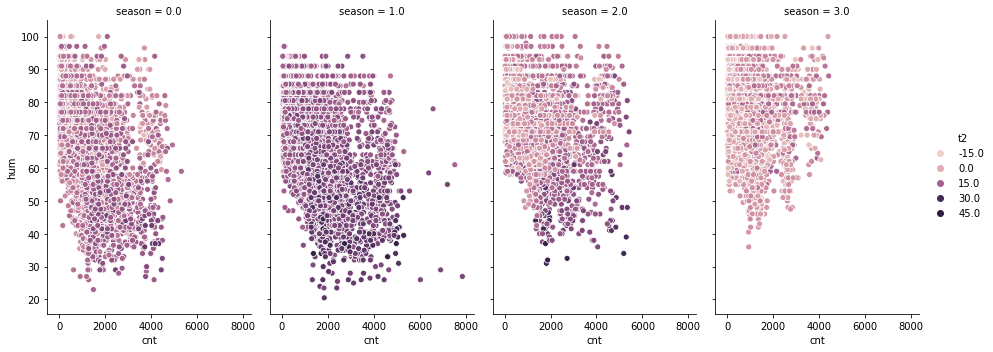

In [575]:
# Bike share based on season and Humidity
plot= sns.relplot(data=data_frame, x='cnt', y='hum', col="season", hue="t2", height=5, aspect=0.65)

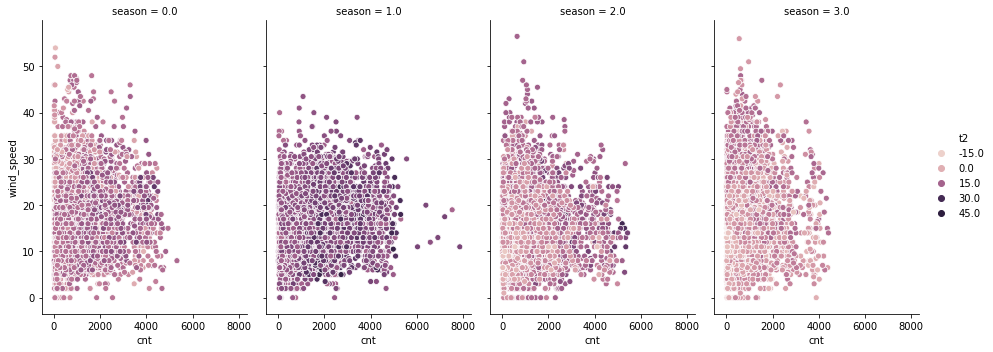

In [576]:
# Bike share based on season and Wind speed
plot= sns.relplot(data=data_frame, x='cnt', y='wind_speed', col="season", hue="t2", height=5, aspect=0.65)

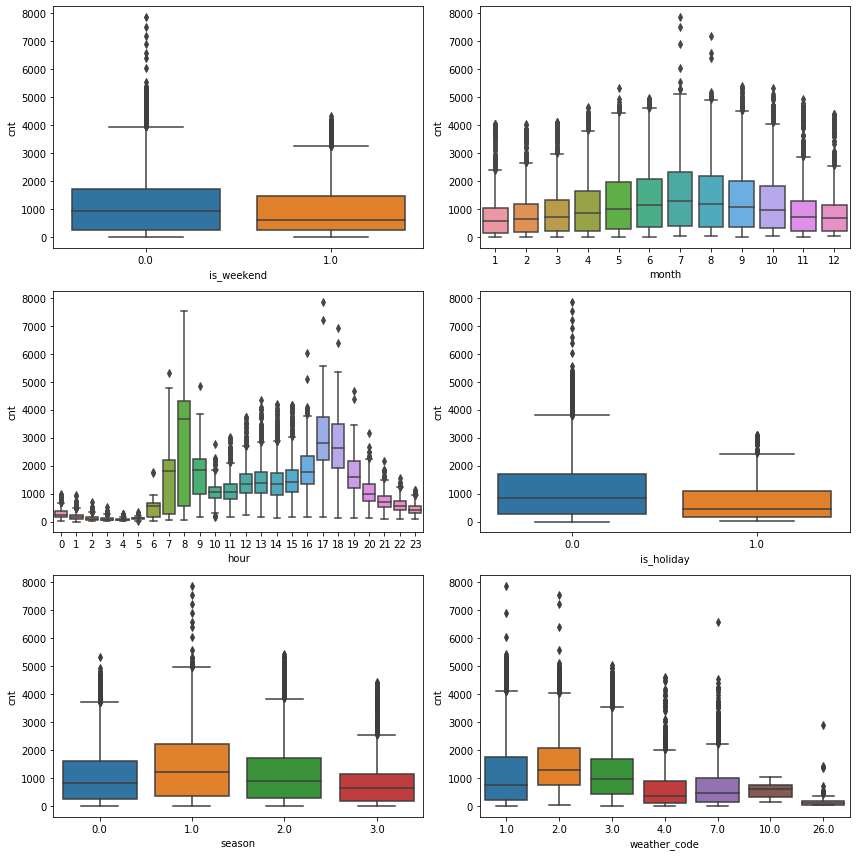

In [577]:
# Bike share based on weekend and Holiday
fig, ax = plt.subplots(3,2, figsize=(12,12))
sns.catplot(x="is_weekend", y="cnt",kind="box", data=data_frame, ax=ax[0,0]) 
sns.catplot(x="month", y="cnt",kind="box", data=data_frame, ax=ax[0,1]) 
sns.catplot(x="hour", y="cnt",kind="box", data=data_frame, ax=ax[1,0]) 
sns.catplot(x="is_holiday", y="cnt",kind="box", data=data_frame, ax=ax[1,1]) 
sns.catplot(x="season", y="cnt",kind="box", data=data_frame, ax=ax[2,0]) 
sns.catplot(x="weather_code", y="cnt",kind="box", data=data_frame, ax=ax[2,1])
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
fig.tight_layout()


## Data Preparation

In [578]:
# function to normalize the features
def Normalize_Function(df, column_list):
    # apply standardization on numerical features
    for column in column_list:
        # fit on training data column
        scale = MinMaxScaler().fit(df[[column]])    
        # transform the training data column
        df[column] = scale.transform(df[[column]])
    
    return df        
 

# columns required to scale
columns_to_scale = ['t1', 't2','hum', 'wind_speed']

# calling the  Normalize_Function to scale the features
data_frame = Normalize_Function(data_frame, columns_to_scale)


# function for onehot encoder
def oneHot_Encoder(data_frame,column,prefix):
    holiday_df = pd.DataFrame(data_frame, columns=[column])
    temp_df = pd.get_dummies(holiday_df,columns= [column],prefix=[prefix] )
    data_frame=data_frame.join(temp_df)
    data_frame= data_frame.drop(columns=[column], axis=0)

    return data_frame

# converting the features into encoded features based on each category
data_frame= oneHot_Encoder(data_frame,'weather_code','W')
data_frame = oneHot_Encoder(data_frame,'season','season')
data_frame = oneHot_Encoder(data_frame,'is_weekend','Weekend')
data_frame = oneHot_Encoder(data_frame,'is_holiday','Holiday')
data_frame.head(5)

,cnt,t1,t2,hum,wind_speed,year,month,day,hour,W_1.0,...,W_10.0,W_26.0,season_0.0,season_1.0,season_2.0,season_3.0,Weekend_0.0,Weekend_1.0,Holiday_0.0,Holiday_1.0
0,182,0.126761,0.2000,0.911950,0.106195,2015,1,4,0,0,...,0,0,0,0,0,1,0,1,1,0
1,138,0.126761,0.2125,0.911950,0.088496,2015,1,4,1,1,...,0,0,0,0,0,1,0,1,1,0
2,134,0.112676,0.2125,0.955975,0.000000,2015,1,4,2,1,...,0,0,0,0,0,1,0,1,1,0
3,72,0.098592,0.2000,1.000000,0.000000,2015,1,4,3,1,...,0,0,0,0,0,1,0,1,1,0
4,47,0.098592,0.1500,0.911950,0.115044,2015,1,4,4,1,...,0,0,0,0,0,1,0,1,1,0


## Modeling and Performance Tuning

In [579]:
# splitting the data frame into Features and Target varibale for Testing  and Training the model 
X = data_frame.drop(columns=['cnt'], axis=0)
y = data_frame['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(data_frame.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17414, 24)
(12189, 23)
(5225, 23)
(12189,)
(5225,)


#### Performance evaluation metrics MSE, RMSE

In [580]:
# Function to Generate the MSE, RMSE
def mse_rmse(trues, preds):
    '''
    Compute MSE and rMSE for each column separately.
    '''
    mse = np.sum(np.square(trues - preds), axis=0) / trues.shape[0]
    rmse = np.sqrt(mse)
    return mse, rmse


def rmse_scorer(trues, preds):
    '''
    Compute rMSE
    '''
    mse, rmse = mse_rmse(trues, preds)
    return rmse
# Make the scoring function for GridSearch
rmse_scoring = make_scorer(rmse_scorer, greater_is_better=False)

In [581]:
# Creating the dataframe for model evaluation metric results
Models_Performance = pd.DataFrame(columns=['Model', 'MSE','Tuning Parameters', 'RMSE'])

In [582]:
def Alpha_Generator(RangeMin, RangeMax):
    base = 2 
    steps =20
    bottom =math.log(RangeMin,base)
    top = math.log(RangeMax,base)
    exps = np.arange(bottom, top, (top-bottom)/steps)
    alphas = [np.power(base, ex) for ex in exps]
    alphas
    return alphas


#### Linear Regression Model

In [583]:
# Linear Regression Model

lm = LinearRegression().fit(X_train, y_train)
lm_pred=lm.predict(X_test)
Linear_MSE, Linear_RMSE=  mse_rmse(y_test, lm_pred)

print("Linear_MSE =", Linear_MSE)
print("Linear_RMSE=", Linear_RMSE)

data =[{'Model': 'Linear_Regression','MSE':Linear_MSE,'Tuning Parameters':'none','RMSE': Linear_RMSE }]
Models_Performance= Models_Performance.append(data, ignore_index=True,sort=False)

Models_Performance

Linear_MSE = 820171.2680446318
Linear_RMSE= 905.6330758340442


,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171.268045,none,905.633076


#### Lasso

In [584]:
lasso = Lasso()
lasso.fit(X_train, y_train)

lasso_pred=lasso.predict(X_test)

lasso_MSE, lasso_RMSE=  mse_rmse(y_test, lasso_pred)

print("lasso_MSE =", lasso_MSE)
print("lasso_RMSE=", lasso_RMSE)

data =[{'Model': 'Lasso','MSE':lasso_MSE,'Tuning Parameters':'none','RMSE': lasso_RMSE }]
Models_Performance=Models_Performance.append(data, ignore_index=True,sort=False)
Models_Performance

lasso_MSE = 821093.2436380495
lasso_RMSE= 906.1419555665931


,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171.268045,none,905.633076
1,Lasso,821093.243638,none,906.141956


#### Lasso With GridsearchCV

In [585]:
# generating alpha values

alphas=Alpha_Generator(1e-4, 1)
alphas

[0.00010000000000000005,
 0.00015848931924611147,
 0.00025118864315095833,
 0.0003981071705534979,
 0.0006309573444801946,
 0.0010000000000000024,
 0.0015848931924611182,
 0.0025118864315095885,
 0.003981071705534987,
 0.006309573444801959,
 0.010000000000000045,
 0.015848931924611214,
 0.025118864315095937,
 0.039810717055349956,
 0.06309573444801972,
 0.10000000000000066,
 0.15848931924611245,
 0.25118864315095984,
 0.39810717055350037,
 0.6309573444801985]

In [586]:
# Applying the GridsearchCV with alpha and CrossValidation

param_grid = [{'alpha':alphas}]
lasso_grid_search = GridSearchCV(estimator=lasso,
                           param_grid=param_grid,
                           scoring=rmse_scoring,
                           n_jobs=-1,
                           verbose= 1,cv=10)

lasso_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   31.9s finished
C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197140141.42737007, tolerance: 1427901.076905587
  positive)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': [0.00010000000000000005,
                                    0.00015848931924611147,
                                    0.00025118864315095833,
                                    0....
                                    0.006309573444801959, 0.010000000000000045,
                                    0.015848931924611214, 0.025118864315095937,
                                    0.039810717055349956, 0.06309573444801972,
                                    0.10000000000000066, 0.15848931924611245,
                                    0.25118864315095984, 0.39810717055350037

In [587]:
stats = lasso_grid_search.cv_results_

In [588]:
Lasso_df = DataFrame(stats)
Lasso_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.623857,0.068772,0.005386,0.000799,0.0001,{'alpha': 0.00010000000000000005},-952.658667,-913.228150,-847.449540,-852.287059,-896.598856,-875.040273,-872.414037,-869.069891,-916.774831,-872.981547,-886.851423,31.017867,6
1,1.622262,0.030052,0.004888,0.000940,0.000158489,{'alpha': 0.00015848931924611147},-952.658608,-913.228203,-847.449625,-852.286844,-896.598801,-875.040392,-872.413989,-869.069816,-916.774861,-872.981646,-886.851416,31.017871,5
2,1.621466,0.030686,0.004883,0.000831,0.000251189,{'alpha': 0.00025118864315095833},-952.658514,-913.228288,-847.449761,-852.286504,-896.598713,-875.040582,-872.413912,-869.069697,-916.774909,-872.981802,-886.851406,31.017877,4
3,1.658663,0.065974,0.005088,0.001440,0.000398107,{'alpha': 0.0003981071705534979},-952.658365,-913.228423,-847.449977,-852.285965,-896.598574,-875.040882,-872.413790,-869.069509,-916.774984,-872.982050,-886.851390,31.017886,3
4,1.660361,0.045830,0.005188,0.000601,0.000630957,{'alpha': 0.0006309573444801946},-952.658130,-913.228637,-847.450319,-852.285112,-896.598355,-875.041359,-872.413598,-869.069212,-916.775104,-872.982444,-886.851365,31.017901,2
5,1.627748,0.034482,0.005088,0.000828,0.001,{'alpha': 0.0010000000000000024},-952.657760,-913.228978,-847.450863,-852.283763,-896.598008,-875.042116,-872.413295,-869.068743,-916.775296,-872.983069,-886.851327,31.017925,1
6,1.628246,0.035076,0.005087,0.001133,0.00158489,{'alpha': 0.0015848931924611182},-952.657176,-913.229521,-847.451728,-852.281632,-896.597462,-875.043320,-872.412817,-869.070117,-916.775603,-872.984064,-886.851482,31.017840,7
7,1.659362,0.050698,0.006686,0.002894,0.00251189,{'alpha': 0.0025118864315095885},-952.656259,-913.230391,-847.453110,-852.278273,-896.596603,-875.045238,-872.412068,-869.070191,-916.776097,-872.985651,-886.851526,31.017826,8
8,1.632335,0.017753,0.006086,0.003009,0.00398107,{'alpha': 0.003981071705534987},-952.654829,-913.231790,-847.455323,-852.272994,-896.595263,-875.048301,-872.410900,-869.070324,-916.776899,-872.988189,-886.851619,31.017801,9
9,1.635326,0.033003,0.005087,0.000697,0.00630957,{'alpha': 0.006309573444801959},-952.652619,-913.234062,-847.458891,-852.264742,-896.593189,-875.053218,-872.409099,-869.070583,-916.778218,-872.992272,-886.851826,31.017754,10


Text(0.5, 1.0, 'RMSE vs Alpha for LASSO')

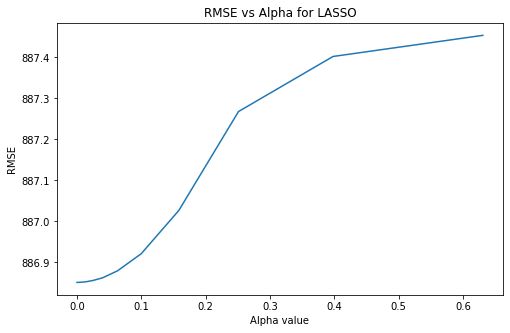

In [589]:
# plot for RMSE vs Alpha for Lasso
scores = (-stats["mean_test_score"])
alpha = stats["param_alpha"]

plt.figure(figsize=(8, 5))
sns.lineplot(alpha, scores)
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.title("RMSE vs Alpha for LASSO")

In [590]:
print("Best Tuning Parameter:",lasso_grid_search.best_params_)
print("Best RMSEscore",-lasso_grid_search.best_score_)

Best Tuning Parameter: {'alpha': 0.0010000000000000024}
Best RMSEscore 886.8513266640291


In [611]:
lasso_bestmodel = lasso_grid_search.best_estimator_
lasso_bestmodel.fit(X_train, y_train)

C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197140141.42737007, tolerance: 1427901.076905587
  positive)


Lasso(alpha=0.0010000000000000024, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [591]:
data =[{'Model': 'Lasso_with_GridsearchCV','MSE':'--','Tuning Parameters':lasso_grid_search.best_params_ ,'RMSE': -lasso_grid_search.best_score_ }]
Models_Performance=Models_Performance.append(data, ignore_index=True,sort=False)
Models_Performance

,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171,none,905.633076
1,Lasso,821093,none,906.141956
2,Lasso_with_GridsearchCV,--,{'alpha': 0.0010000000000000024},886.851327


#### Ridge

In [592]:
ridge = Ridge()
ridge.fit(X_train, y_train)
Ridge_pred=ridge.predict(X_test)

Ridge_MSE, Ridge_RMSE=  mse_rmse(y_test, Ridge_pred)

print("Ridge_MSE =", Ridge_MSE)
print("Ridge_RMSE=", Ridge_RMSE)


data =[{'Model': 'Ridge','MSE':Ridge_MSE,'Tuning Parameters':'--','RMSE': Ridge_RMSE }]
Models_Performance=Models_Performance.append(data, ignore_index=True,sort=False)
Models_Performance

Ridge_MSE = 820408.9581355178
Ridge_RMSE= 905.764295021347


,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171,none,905.633076
1,Lasso,821093,none,906.141956
2,Lasso_with_GridsearchCV,--,{'alpha': 0.0010000000000000024},886.851327
3,Ridge,820409,--,905.764295


#### Ridge with GridsearchCV

In [593]:
# generating alpha values
alphas=Alpha_Generator(1, 1e-6)
alphas

[1.0,
 0.5011872336272722,
 0.251188643150958,
 0.12589254117941673,
 0.06309573444801933,
 0.03162277660168379,
 0.015848931924611134,
 0.007943282347242816,
 0.0039810717055349725,
 0.001995262314968881,
 0.001,
 0.000501187233627272,
 0.000251188643150958,
 0.0001258925411794168,
 6.309573444801933e-05,
 3.1622776601683775e-05,
 1.5848931924611134e-05,
 7.94328234724282e-06,
 3.981071705534978e-06,
 1.9952623149688787e-06]

In [594]:
# Applying the GridsearchCV with alpha and CrossValidation

param_grid = [{'alpha':alphas}]
ridge_grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring=rmse_scoring,
                           n_jobs=-1,
                           verbose= 1,cv=10)

ridge_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': [1.0, 0.5011872336272722, 0.251188643150958,
                                    0.12589254117941673, 0.06309573444801933,
                                    0.03162277660168379, 0.015848931924611134,
                                    0.00...
                                    0.001995262314968881, 0.001,
                                    0.000501187233627272, 0.000251188643150958,
                                    0.0001258925411794168,
                                    6.309573444801933e-05,
                                    3.1622776601683775e-05,
                                    1.5848931924611134e-05,
                                    7.

In [595]:
stats = ridge_grid_search.cv_results_

In [596]:
Ridge_df = DataFrame(stats)
Ridge_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011170,0.002263,0.001596,0.000799,1,{'alpha': 1.0},-952.671332,-913.378222,-847.730488,-851.762524,-896.617687,-875.482423,-872.487619,-869.041774,-916.937725,-873.314985,-886.943596,31.039849,20
1,0.009375,0.002569,0.001695,0.000456,0.501187,{'alpha': 0.5011872336272722},-952.643921,-913.295096,-847.593808,-851.942575,-896.591505,-875.273471,-872.434035,-869.025164,-916.839709,-873.154773,-886.880532,31.031897,19
2,0.018751,0.004839,0.003291,0.000778,0.251189,{'alpha': 0.251188643150958},-952.642755,-913.257338,-847.521096,-852.085941,-896.587866,-875.159204,-872.416897,-869.035694,-916.800078,-873.068615,-886.858680,31.025906,18
3,0.020744,0.005003,0.002594,0.000489,0.125893,{'alpha': 0.12589254117941673},-952.647957,-913.241192,-847.484811,-852.177772,-896.590930,-875.100114,-872.413123,-869.049052,-916.785040,-873.024902,-886.852624,31.022190,17
4,0.021343,0.006929,0.002892,0.000698,0.0630957,{'alpha': 0.06309573444801933},-952.652549,-913.234179,-847.466955,-852.230063,-896.594212,-875.070210,-872.412927,-869.058441,-916.779218,-873.003093,-886.851321,31.020112,3
5,0.021244,0.002320,0.003290,0.000457,0.0316228,{'alpha': 0.03162277660168379},-952.655436,-913.231000,-847.458139,-852.258040,-896.596381,-875.055181,-872.413335,-869.063929,-916.776814,-872.992230,-886.851185,31.019010,1
6,0.020844,0.000829,0.003093,0.000301,0.0158489,{'alpha': 0.015848931924611134},-952.657042,-913.229499,-847.453761,-852.272535,-896.597612,-875.047644,-872.413678,-869.066893,-916.775750,-872.986808,-886.851259,31.018442,2
7,0.023138,0.005350,0.004489,0.002196,0.00794328,{'alpha': 0.007943282347242816},-952.657889,-913.228772,-847.451578,-852.279921,-896.598267,-875.043865,-872.413886,-869.068433,-916.775253,-872.984098,-886.851334,31.018153,4
8,0.022339,0.002240,0.003590,0.001492,0.00398107,{'alpha': 0.0039810717055349725},-952.658324,-913.228414,-847.450487,-852.283655,-896.598605,-875.041972,-872.414000,-869.069219,-916.775014,-872.982741,-886.851381,31.018008,5
9,0.022142,0.002668,0.002991,0.000003,0.00199526,{'alpha': 0.001995262314968881},-952.658545,-913.228236,-847.449941,-852.285534,-896.598777,-875.041023,-872.414059,-869.069617,-916.774896,-872.982061,-886.851407,31.017934,6


Text(0.5, 1.0, 'RMSE vs Alpha for Ridge')

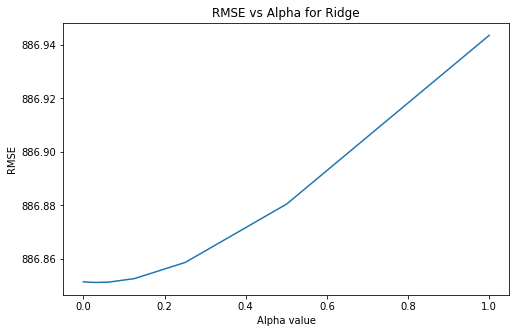

In [597]:
# plot for RMSE vs Alpha for Lasso
scores = (-stats["mean_test_score"])
alpha = stats["param_alpha"]

plt.figure(figsize=(8, 5))
sns.lineplot(alpha, scores)
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.title("RMSE vs Alpha for Ridge")

In [598]:
print("Best Tuning Parameter:",ridge_grid_search.best_params_)
print("Best RMSEscore",-ridge_grid_search.best_score_)

Best Tuning Parameter: {'alpha': 0.03162277660168379}
Best RMSEscore 886.8511854417852


In [610]:
ridge_bestmodel = ridge_grid_search.best_estimator_
ridge_bestmodel.fit(X_train, y_train)

Ridge(alpha=0.03162277660168379, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [599]:
data =[{'Model': 'Ridge_with_GridsearchCV','MSE':'--','Tuning Parameters':ridge_grid_search.best_params_ ,'RMSE': -ridge_grid_search.best_score_ }]
Models_Performance=Models_Performance.append(data, ignore_index=True,sort=False)
Models_Performance

,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171,none,905.633076
1,Lasso,821093,none,906.141956
2,Lasso_with_GridsearchCV,--,{'alpha': 0.0010000000000000024},886.851327
3,Ridge,820409,--,905.764295
4,Ridge_with_GridsearchCV,--,{'alpha': 0.03162277660168379},886.851185


#### Elastic Net

In [600]:
elastic = ElasticNet(alpha=0.002, l1_ratio= 0.5)
elastic.fit(X_train, y_train)
elastic_pred=elastic.predict(X_test)

elastic_MSE, elastic_RMSE=  mse_rmse(y_test, elastic_pred)

print("elastic_MSE =", elastic_MSE)
print("elastic_RMSE=", elastic_RMSE)


data =[{'Model': 'Elastic','MSE':elastic_MSE,'Tuning Parameters':'--','RMSE': elastic_RMSE }]
Models_Performance=Models_Performance.append(data, ignore_index=True,sort=False)
Models_Performance

elastic_MSE = 821754.1569982297
elastic_RMSE= 906.5065675428003


,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171,none,905.633076
1,Lasso,821093,none,906.141956
2,Lasso_with_GridsearchCV,--,{'alpha': 0.0010000000000000024},886.851327
3,Ridge,820409,--,905.764295
4,Ridge_with_GridsearchCV,--,{'alpha': 0.03162277660168379},886.851185
5,Elastic,821754,--,906.506568


#### Elasticnet with GridsearchCV

In [601]:
# Generating the alphas and L1 Ratios
alphas =Alpha_Generator(1, 1e-6)
print(alphas)
l1_ratios = np.arange(0, 1.2, .2)
print(l1_ratios)

[1.0, 0.5011872336272722, 0.251188643150958, 0.12589254117941673, 0.06309573444801933, 0.03162277660168379, 0.015848931924611134, 0.007943282347242816, 0.0039810717055349725, 0.001995262314968881, 0.001, 0.000501187233627272, 0.000251188643150958, 0.0001258925411794168, 6.309573444801933e-05, 3.1622776601683775e-05, 1.5848931924611134e-05, 7.94328234724282e-06, 3.981071705534978e-06, 1.9952623149688787e-06]
[0.  0.2 0.4 0.6 0.8 1. ]


In [602]:
# Applying the GridsearchCV with alpha and CrossValidation
param_grid = [{'alpha':alphas, 'l1_ratio': l1_ratios}]
elastic_grid_search = GridSearchCV(estimator=elastic,
                           param_grid=param_grid,
                           scoring=rmse_scoring,
                           n_jobs=-1,
                           verbose= 1,cv=10)

elastic_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.9min finished
C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4688111186.578001, tolerance: 1427901.076905587
  positive)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=0.002, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': [1.0, 0.5011872336272722, 0.251188643150958,
                                    0.12589254...
                                    0.000501187233627272, 0.000251188643150958,
                                    0.0001258925411794168,
                                    6.309573444801933e-05,
                                    3.1622776601683775e-05,
                                    1.5848931924611134e-05,
                                    7.94328234724282e-06, 3.981071705534978e-06,
                

In [609]:
stats = elastic_grid_search.cv_results_

elastic_bestmodel = elastic_grid_search.best_estimator_
elastic_bestmodel.fit(X_train, y_train)

C:\Users\Prudhvi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4688111186.578001, tolerance: 1427901.076905587
  positive)


ElasticNet(alpha=1.5848931924611134e-05, copy_X=True, fit_intercept=True,
           l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [604]:
elastic_df = DataFrame(stats)
elastic_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.635029,0.276505,0.005688,0.002524,1,0,"{'alpha': 1.0, 'l1_ratio': 0.0}",-1052.150114,-1022.375611,-950.199058,-956.108664,-983.821756,-997.027513,-984.707907,-983.474174,-1042.984465,-967.849349,-994.072012,33.067210,120
1,0.025930,0.007165,0.003590,0.000797,1,0.2,"{'alpha': 1.0, 'l1_ratio': 0.2}",-1047.786966,-1017.529857,-945.386788,-951.975081,-979.512929,-992.415420,-980.156473,-978.524542,-1038.516040,-963.689104,-989.551442,33.048811,119
2,0.018251,0.002640,0.002593,0.000488,1,0.4,"{'alpha': 1.0, 'l1_ratio': 0.4}",-1041.546634,-1010.558161,-938.516603,-946.114054,-973.418002,-985.798189,-973.639050,-971.457074,-1032.118303,-957.815637,-983.100245,33.006287,118
3,0.020445,0.001851,0.002890,0.000539,1,0.6,"{'alpha': 1.0, 'l1_ratio': 0.6000000000000001}",-1031.825009,-999.634919,-927.851095,-937.041220,-964.046890,-975.423329,-963.429837,-960.448836,-1022.071039,-948.810048,-973.060211,32.908815,116
4,0.022341,0.003000,0.002991,0.000774,1,0.8,"{'alpha': 1.0, 'l1_ratio': 0.8}",-1014.031288,-979.510542,-908.521446,-920.387354,-947.233316,-956.150404,-944.423839,-940.279685,-1003.137162,-932.688319,-954.638136,32.631414,112
5,0.076096,0.016044,0.004687,0.001342,1,1,"{'alpha': 1.0, 'l1_ratio': 1.0}",-952.288745,-914.160982,-848.636944,-852.358505,-896.588762,-876.664358,-873.048602,-870.007598,-917.970117,-874.092011,-887.582769,30.785157,69
6,1.757202,0.060105,0.005287,0.000777,0.501187,0,"{'alpha': 0.5011872336272722, 'l1_ratio': 0.0}",-1037.049583,-1005.510770,-933.532988,-941.917100,-969.049770,-980.978264,-968.891939,-966.333868,-1027.468489,-953.644924,-978.439804,32.969366,117
7,0.039593,0.007331,0.004888,0.000537,0.501187,0.2,"{'alpha': 0.5011872336272722, 'l1_ratio': 0.2}",-1031.560514,-999.333267,-927.510779,-936.800885,-963.774289,-975.103118,-963.109258,-960.109808,-1021.777120,-948.585436,-972.768431,32.910610,115
8,0.039592,0.008191,0.004290,0.000780,0.501187,0.4,"{'alpha': 0.5011872336272722, 'l1_ratio': 0.4}",-1024.218233,-991.036878,-919.486941,-929.951401,-956.779443,-967.187798,-955.314945,-951.773810,-1014.067645,-941.888073,-965.172427,32.814022,114
9,0.039994,0.004937,0.004289,0.000457,0.501187,0.6,"{'alpha': 0.5011872336272722, 'l1_ratio': 0.60...",-1013.691274,-979.105002,-908.084425,-920.061686,-946.872830,-955.711745,-943.996521,-939.819119,-1002.749573,-932.403301,-954.251340,32.635946,111


In [605]:
print("Best Tuning Parameter:",elastic_grid_search.best_params_)
print("Best RMSEscore",-elastic_grid_search.best_score_)

Best Tuning Parameter: {'alpha': 1.5848931924611134e-05, 'l1_ratio': 0.8}
Best RMSEscore 886.8511866710917


In [606]:
data =[{'Model': 'Elastic_with_GridsearchCV','MSE':'--','Tuning Parameters':elastic_grid_search.best_params_ ,'RMSE': -elastic_grid_search.best_score_ }]
Models_Performance=Models_Performance.append(data, ignore_index=True,sort=False)
Models_Performance

,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171,none,905.633076
1,Lasso,821093,none,906.141956
2,Lasso_with_GridsearchCV,--,{'alpha': 0.0010000000000000024},886.851327
3,Ridge,820409,--,905.764295
4,Ridge_with_GridsearchCV,--,{'alpha': 0.03162277660168379},886.851185
5,Elastic,821754,--,906.506568
6,Elastic_with_GridsearchCV,--,"{'alpha': 1.5848931924611134e-05, 'l1_ratio': ...",886.851187


## Model Evaulation Metrics

In [607]:
# displaying the Evaluation metrics table
with pd.option_context('display.max_colwidth', -1):
    display(Models_Performance)

,Model,MSE,Tuning Parameters,RMSE
0,Linear_Regression,820171,none,905.633076
1,Lasso,821093,none,906.141956
2,Lasso_with_GridsearchCV,--,{'alpha': 0.0010000000000000024},886.851327
3,Ridge,820409,--,905.764295
4,Ridge_with_GridsearchCV,--,{'alpha': 0.03162277660168379},886.851185
5,Elastic,821754,--,906.506568
6,Elastic_with_GridsearchCV,--,"{'alpha': 1.5848931924611134e-05, 'l1_ratio': 0.8}",886.851187
